Take a look at the [repository](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix) for more information

# Install

In [1]:
!git clone https://github.com/bkmulusew/generative_cycle_gan

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2443, done.
remote: Total 2443 (delta 0), reused 0 (delta 0), pack-reused 2443
Receiving objects: 100% (2443/2443), 8.13 MiB | 22.88 MiB/s, done.
Resolving deltas: 100% (1570/1570), done.


In [2]:
import os
os.chdir('generative_cycle_gan/')
print(os.getcwd())

/content/pytorch-CycleGAN-and-pix2pix


In [3]:
!pip install -r requirements.txt

     |████████████████████████████████| 676 kB 13.2 MB/s 
     |████████████████████████████████| 1.7 MB 76.5 MB/s 
     |████████████████████████████████| 53 kB 2.0 MB/s 
     |████████████████████████████████| 140 kB 73.2 MB/s 
     |████████████████████████████████| 97 kB 7.3 MB/s 
     |████████████████████████████████| 180 kB 70.6 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
  Created wheel for visdom: filename=visdom-0.1.8.9-py3-none-any.whl size=655250 sha256=2e79418388531c8aae9c91abb7f18fa2b9001832024abce5bd68c6804df09089
  Stored in directory: /root/.cache/pip/wheels/2d/d1/9b/cde923274eac9cbb6ff0d8c7c72fe30a3da9095a38fd50bbf1
  Created wheel for subprocess32: filename=subprocess32-3.5.4-py3-none-any.whl size=6502 sha256=f497fada69aaf60cc6c71cebd64803921b46dddd19c2008207b82101170bd4f2
  Stored in directory: /root/.cache/pip/wheels/50/ca/fa/8fca8d246e64f19488d07567547ddec8eb084e8c0d7a59226a
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl

# Datasets

Download one of the official datasets with:

-   `bash ./datasets/download_cyclegan_dataset.sh [apple2orange, summer2winter_yosemite, horse2zebra, monet2photo, cezanne2photo, ukiyoe2photo, vangogh2photo, maps, cityscapes, facades, iphone2dslr_flower, ae_photos]`

Or use your own dataset by creating the appropriate folders and adding in the images.

-   Create a dataset folder under `/dataset` for your dataset.
-   Create subfolders `testA`, `testB`, `trainA`, and `trainB` under your dataset's folder. Place any images you want to transform from a to b (cat2dog) in the `testA` folder, images you want to transform from b to a (dog2cat) in the `testB` folder, and do the same for the `trainA` and `trainB` folders.

In [ ]:
!bash ./datasets/download_cyclegan_dataset.sh monet2photo

Streaming output truncated to the last 5000 lines.
  inflating: ./datasets/monet2photo/trainB/2016-03-31 05:58:36.jpg  
  inflating: ./datasets/monet2photo/trainB/2014-01-10 12:46:39.jpg  
  inflating: ./datasets/monet2photo/trainB/2015-02-23 11:45:00.jpg  
  inflating: ./datasets/monet2photo/trainB/2015-05-23 09:38:08.jpg  
  inflating: ./datasets/monet2photo/trainB/2016-01-15 00:48:49.jpg  
  inflating: ./datasets/monet2photo/trainB/2016-12-27 18:15:26.jpg  
  inflating: ./datasets/monet2photo/trainB/2017-01-02 11:16:05.jpg  
  inflating: ./datasets/monet2photo/trainB/2015-08-06 11:08:32.jpg  
  inflating: ./datasets/monet2photo/trainB/2015-12-16 07:43:36.jpg  
  inflating: ./datasets/monet2photo/trainB/2016-03-25 12:57:28.jpg  
  inflating: ./datasets/monet2photo/trainB/2016-05-10 11:44:44.jpg  
  inflating: ./datasets/monet2photo/trainB/2015-03-11 08:01:52.jpg  
  inflating: ./datasets/monet2photo/trainB/2015-08-30 05:26:05.jpg  
  inflating: ./datasets/monet2photo/trainB/2015-10-0

# Pretrained models

Download one of the official pretrained models with:

-   `bash ./scripts/download_cyclegan_model.sh [apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower]`

Or add your own pretrained model to `./checkpoints/{NAME}_pretrained/latest_net_G.pt`

In [ ]:
!bash ./scripts/download_cyclegan_model.sh monet2photo

Note: available models are apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower
Specified [monet2photo]
for details.

--2021-12-07 00:23:48--  http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/monet2photo.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45575747 (43M)
Saving to: ‘./checkpoints/monet2photo_pretrained/latest_net_G.pth’

./checkpoints/monet 100%[===================>]  43.46M   477KB/s    in 79s     

2021-12-07 00:25:08 (564 KB/s) - ‘./checkpoints/monet2photo_pretrained/latest_net_G.pth’ saved [45575747/45575747]



# Training

-   `python train.py --dataroot ./datasets/horse2zebra --name horse2zebra --model cycle_gan`

Change the `--dataroot` and `--name` to your own dataset's path and model's name. Use `--gpu_ids 0,1,..` to train on multiple GPUs and `--batch_size` to change the batch size. I've found that a batch size of 16 fits onto 4 V100s and can finish training an epoch in ~90s.

Once your model has trained, copy over the last checkpoint to a format that the testing model can automatically detect:

Use `cp ./checkpoints/horse2zebra/latest_net_G_A.pth ./checkpoints/horse2zebra/latest_net_G.pth` if you want to transform images from class A to class B and `cp ./checkpoints/horse2zebra/latest_net_G_B.pth ./checkpoints/horse2zebra/latest_net_G.pth` if you want to transform images from class B to class A.


In [4]:
!python train.py --dataroot ./datasets/monet2photo --name monet2photo_generative --model generative_cycle_gan --use_wandb --netG unet_256 --batch_size 16 --gpu_ids 0 --include_pretrainedGAN --n_epochs 100 --n_epochs_decay 0

Traceback (most recent call last):
  File "train.py", line 28, in <module>
    opt = TrainOptions().parse()   # get training options
  File "/content/pytorch-CycleGAN-and-pix2pix/options/base_options.py", line 116, in parse
    opt = self.gather_options()
  File "/content/pytorch-CycleGAN-and-pix2pix/options/base_options.py", line 76, in gather_options
    model_option_setter = models.get_option_setter(model_name)
  File "/content/pytorch-CycleGAN-and-pix2pix/models/__init__.py", line 50, in get_option_setter
    model_class = find_model_using_name(model_name)
  File "/content/pytorch-CycleGAN-and-pix2pix/models/__init__.py", line 33, in find_model_using_name
    modellib = importlib.import_module(model_filename)
  File "/usr/lib/python3.7/importlib/__init__.py", line 127, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 1006, in _gcd_import
  File "<frozen importlib._bootstrap>", line 983, in _find_and_load
 

# Testing

-   `python test.py --dataroot datasets/horse2zebra/testA --name horse2zebra_pretrained --model test --no_dropout`

Change the `--dataroot` and `--name` to be consistent with your trained model's configuration.

> from https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix:
> The option --model test is used for generating results of CycleGAN only for one side. This option will automatically set --dataset_mode single, which only loads the images from one set. On the contrary, using --model cycle_gan requires loading and generating results in both directions, which is sometimes unnecessary. The results will be saved at ./results/. Use --results_dir {directory_path_to_save_result} to specify the results directory.

> For your own experiments, you might want to specify --netG, --norm, --no_dropout to match the generator architecture of the trained model.

In [5]:
#print(os.getcwd())
#!cp ./checkpoints/monet2photo/latest_net_G_A.pth ./checkpoints/monet2photo/latest_net_G.pth
!python test.py --dataroot datasets/monet2photo --name monet2photo_generative --model generative_cycle_gan  --no_dropout --gpu_ids 0 --netG unet_256

Traceback (most recent call last):
  File "test.py", line 43, in <module>
    opt = TestOptions().parse()  # get test options
  File "/content/pytorch-CycleGAN-and-pix2pix/options/base_options.py", line 116, in parse
    opt = self.gather_options()
  File "/content/pytorch-CycleGAN-and-pix2pix/options/base_options.py", line 76, in gather_options
    model_option_setter = models.get_option_setter(model_name)
  File "/content/pytorch-CycleGAN-and-pix2pix/models/__init__.py", line 50, in get_option_setter
    model_class = find_model_using_name(model_name)
  File "/content/pytorch-CycleGAN-and-pix2pix/models/__init__.py", line 33, in find_model_using_name
    modellib = importlib.import_module(model_filename)
  File "/usr/lib/python3.7/importlib/__init__.py", line 127, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 1006, in _gcd_import
  File "<frozen importlib._bootstrap>", line 983, in _find_and_load
  File "

# Visualize

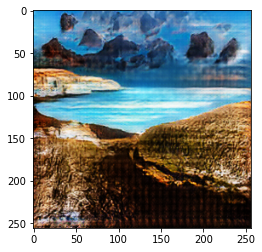

In [ ]:
import matplotlib.pyplot as plt

img = plt.imread('./results/monet2photo_generative/test_latest/images/00010_Input_Images.png')
plt.imshow(img)
img = plt.imread('./results/monet2photo_generative/test_latest/images/00010_GAN_Images.png')
plt.imshow(img)
img = plt.imread('./results/monet2photo_generative/test_latest/images/00010_Encoded_Images.png')
plt.imshow(img)

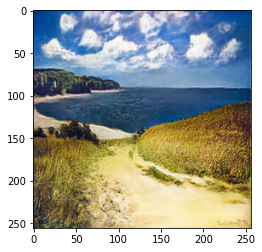

In [ ]:
import matplotlib.pyplot as plt

img = plt.imread('./results/monet2photo_generative/test_latest/images/00010_GAN_Images.png')
plt.imshow(img)

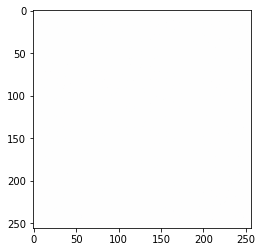

In [ ]:
import matplotlib.pyplot as plt

img = plt.imread('./results/monet2photo_generative/test_latest/images/00550_Encoded_Images.png')
plt.imshow(img)